In [117]:
# Import dependencies
import pandas as pd
import json
import requests 
import numpy as np
import requests
from scipy.stats import linregress
import pprint as pprint
import datetime
import matplotlib.pyplot as plt
from citipy import citipy
import time as time
%matplotlib notebook
import seaborn as sns
%matplotlib inline
import matplotlib.dates as mdates

In [118]:
# Reference to CSV and reading CSV into Pandas DataFrame
# csv_path1 = "Resources/country_vaccinations.csv"
# csv_path2 = "Resources/gdp-csv.csv"
# csv_path3 = "Resources/time_series_covid_19_confirmed.csv"
# csv_path4 = "Resources/time_series_covid_19_deaths.csv"
# csv_path5 = "Resources/time_series_covid_19_recovered.csv"
# csv_path6 = "Resources/WorldPopulation.csv"
# csv_path7 = "Resources/country_vaccinations_by_manufacturer.csv"
csv_path = "COVID_19_time_series_clean_complete_All_Data.csv"

# merging final combined CSV meta file

# country_vaccinations_df = pd.read_csv(csv_path1)
# gdp_df = pd.read_csv(csv_path2)
# covid_19_confirmed_df = pd.read_csv(csv_path3)
# covid_19_deaths_df = pd.read_csv(csv_path4)
covid_df = pd.read_csv(csv_path)
# WorldPopulations_df = pd.read_csv(csv_path6)
# country_vaccinations_by_manufacturer_df = pd.read_csv(csv_path7)



In [119]:
covid_df.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0


In [120]:
covid_df = pd.DataFrame(covid_df)
covid_df

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
89657,89657,2021-05-02,Vietnam,2962,35,2549.0,378.0,20,0,1
89658,89658,2021-05-02,West Bank and Gaza,297638,3272,275392.0,18974.0,1176,23,3059
89659,89659,2021-05-02,Yemen,6341,1233,2875.0,2233.0,16,4,81
89660,89660,2021-05-02,Zambia,91693,1253,90082.0,358.0,23,2,70


In [121]:
covid_df = covid_df.rename(columns = {"Unnamed: 0" : "Index"})
# del covid_df["Unnamed: 0"]
covid_df

,Index,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
89657,89657,2021-05-02,Vietnam,2962,35,2549.0,378.0,20,0,1
89658,89658,2021-05-02,West Bank and Gaza,297638,3272,275392.0,18974.0,1176,23,3059
89659,89659,2021-05-02,Yemen,6341,1233,2875.0,2233.0,16,4,81
89660,89660,2021-05-02,Zambia,91693,1253,90082.0,358.0,23,2,70


In [122]:
covid_df = covid_df.drop(columns = {"Index", "New cases", "New deaths", "New recovered"})
covid_df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Afghanistan,0,0,0.0,0.0
1,2020-01-22,Albania,0,0,0.0,0.0
2,2020-01-22,Algeria,0,0,0.0,0.0
3,2020-01-22,Andorra,0,0,0.0,0.0
4,2020-01-22,Angola,0,0,0.0,0.0
...,...,...,...,...,...,...
89657,2021-05-02,Vietnam,2962,35,2549.0,378.0
89658,2021-05-02,West Bank and Gaza,297638,3272,275392.0,18974.0
89659,2021-05-02,Yemen,6341,1233,2875.0,2233.0
89660,2021-05-02,Zambia,91693,1253,90082.0,358.0


In [123]:
covid_df = covid_df.groupby(covid_df['Date']).sum()
covid_df

,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,557,17,30.0,510.0
2020-01-23,655,18,32.0,605.0
2020-01-24,941,26,39.0,876.0
2020-01-25,1433,42,42.0,1349.0
2020-01-26,2118,56,56.0,2006.0
...,...,...,...,...
2021-04-28,149622851,3151122,85650962.0,60820767.0
2021-04-29,150520453,3166125,86348595.0,61005733.0
2021-04-30,151399467,3180403,87025174.0,61193890.0


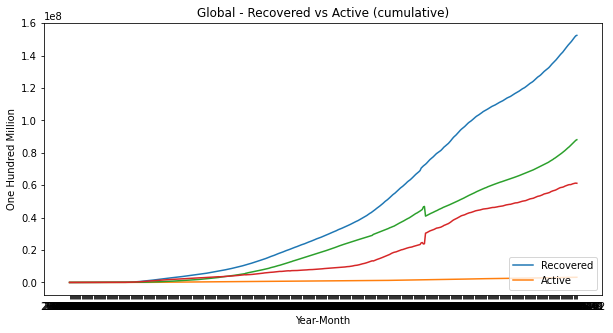

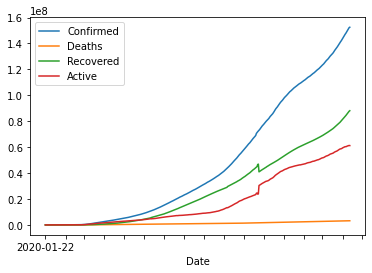

In [128]:
plt.figure(figsize=(10,5))
# y_axis = covid_df["Recovered"].tolist()
# x_axis = covid_df.index.tolist()
# plt.plot(x_axis, y_axis)
plt.xlabel("Year-Month")
plt.ylabel("One Hundred Million")
plt.title("Global - Recovered vs Active (cumulative)")
plt.plot(covid_df)
plt.legend(["Recovered", "Active"], loc = "lower right")
# plt.savefig("global_Recovered_and_Active_cumulative.png")


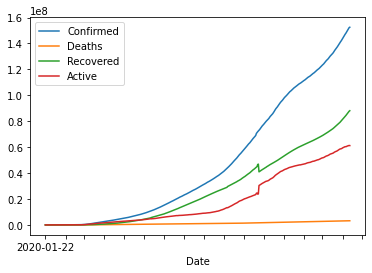

In [130]:
ax = covid_df.plot(x_compat=True)
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.savefig("global_allData_cumulative.png")
plt.show()

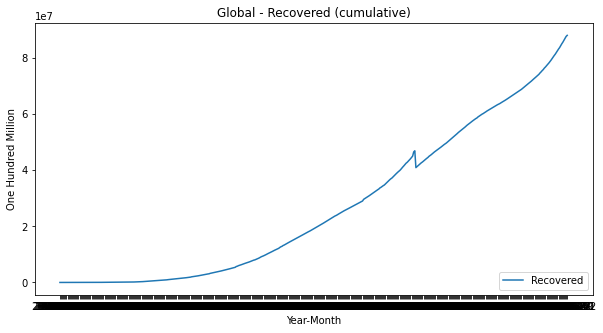

In [129]:
plt.figure(figsize=(10,5))
y_axis = covid_df["Recovered"].tolist()
x_axis = covid_df.index.tolist()
plt.plot(x_axis, y_axis)
plt.xlabel("Year-Month")
plt.ylabel("One Hundred Million")
plt.title("Global - Recovered (cumulative)")
plt.legend(["Recovered"], loc = "lower right")
# plt.savefig("global_recovered_cumulative.png")
plt.show()

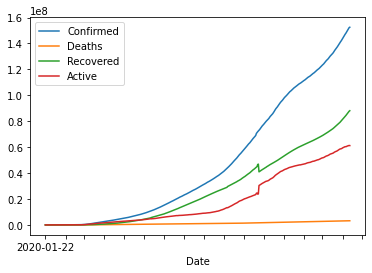

In [126]:
# covid_df = pd.DataFrame(np.random.rand(100,2), index=pd.date_range('1-1-2018', periods=100))
ax = covid_df.plot(x_compat=True)
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.savefig("global_allData_cumulative.png")
plt.show()

In [127]:
covid_df['Country/Region']

KeyError: 'Country/Region'

In [ ]:
covid_df['Country/Region'].nunique()

In [ ]:
covid_df['Country/Region'].count()

In [ ]:
covid_df['Country/Region'].nunique

In [ ]:
covid_df = covid_df.groupby(covid_df['Date']).sum()
covid_df

In [ ]:
recovered = covid_df

recovered.columns[4:]

recovered_long = recovered.melt(id_vars = ['Province/State','Country/Region','Lat','Long'],
                         value_vars = recovered.columns[4:],
                         var_name = 'Dates',  
                         value_name='Recovered')
del recovered_long['Province/State']
recovered_long['Dates'] = pd.to_datetime(recovered_long['Dates'])
recovered_long['Month'] = recovered_long['Dates'].dt.month
recovered_long['Year'] = recovered_long['Dates'].dt.year
del recovered_long['Dates']


del recovered_long['Lat']
del recovered_long['Long']

recovered_long_clean = recovered_long.sort_values(['Month','Year'])
recovered_long_clean

In [ ]:

recovered_long_date = recovered_long_clean.groupby(['Month','Year'])['recovered'].sum().reset_index()
recovered_long_date = recovered_long_date.sort_values(['Month','Year'])

recovered_2020 = recovered_long_date[recovered_long_date['Year'] == 2020]
recovered_2020['Date'] = recovered_2020['Month'].astype(str)+ ' / ' + recovered_2020['Year'].astype(str)
del recovered_2020['Month']
del recovered_2020['Year']

recovered_2021 = recovered_long_date[recovered_long_date['Year'] == 2021]
recovered_2021['Date'] = recovered_2021['Month'].astype(str)+ ' / ' + recovered_2021['Year'].astype(str)
del recovered_2021['Month']
del recovered_2021['Year']

recovered_total_per_month = recovered_2020.append(recovered_2021)

In [ ]:
recovered_total_per_month = recovered_total_per_month[['Date','Recovered']].reset_index()
del recovered_total_per_month['index']
recovered_total_per_month.to_csv('recovered_date.csv')
print(recovered_total_per_month)

In [ ]:

recovered_long_country = recovered_long_clean.groupby('Country/Region').sum()
del recovered_long_country['Month']
del recovered_long_country['Year']
recovered_long_country.to_csv('recovered_country.csv')
print(recovered_long_country)